In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import layers

In [10]:
import pathlib
data_train = 'D:/07 Skripsi/dataset/images'

In [11]:
#image augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)


In [12]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4521 images belonging to 6 classes.
Found 1128 images belonging to 6 classes.


In [13]:
from tensorflow.keras.layers import Input
model = tf.keras.models.Sequential([
    ResNet152V2(
        weights='imagenet',
        include_top=False,
        input_tensor=Input(shape=(150,150,3))
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.layers[0].trainable=False

In [14]:
model.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=2
)

Epoch 1/5
71/71 - 1088s - loss: 2.2109 - accuracy: 0.6264 - val_loss: 1.0279 - val_accuracy: 0.7598 - 1088s/epoch - 15s/step
Epoch 2/5
71/71 - 981s - loss: 0.4951 - accuracy: 0.8230 - val_loss: 1.0667 - val_accuracy: 0.7465 - 981s/epoch - 14s/step
Epoch 3/5
71/71 - 840s - loss: 0.3988 - accuracy: 0.8604 - val_loss: 1.2014 - val_accuracy: 0.7677 - 840s/epoch - 12s/step
Epoch 4/5
71/71 - 641s - loss: 0.3014 - accuracy: 0.8958 - val_loss: 1.1287 - val_accuracy: 0.7846 - 641s/epoch - 9s/step
Epoch 5/5
71/71 - 707s - loss: 0.2466 - accuracy: 0.9195 - val_loss: 1.1400 - val_accuracy: 0.8023 - 707s/epoch - 10s/step


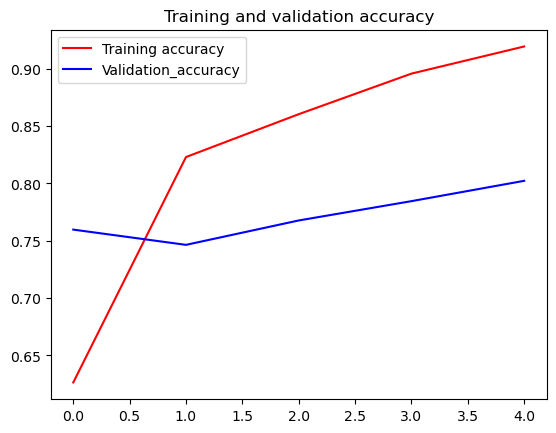

<Figure size 640x480 with 0 Axes>

In [18]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

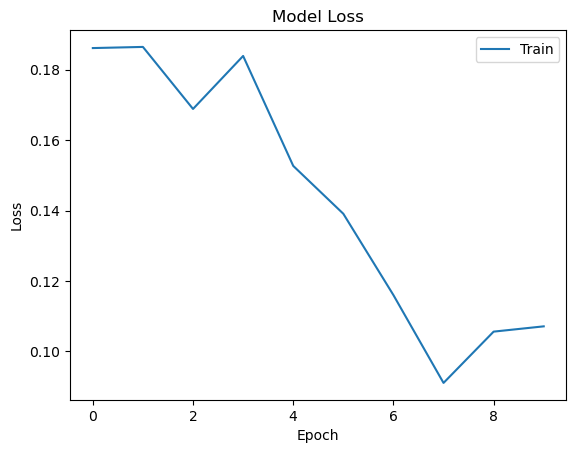

In [22]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper right')
plt.show()

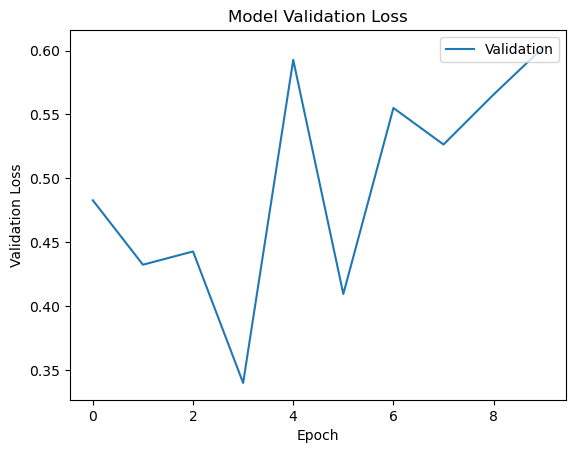

In [23]:
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'],loc='upper right')
plt.show()

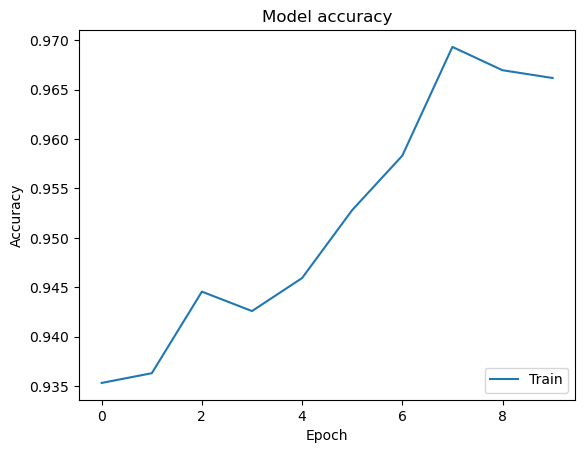

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

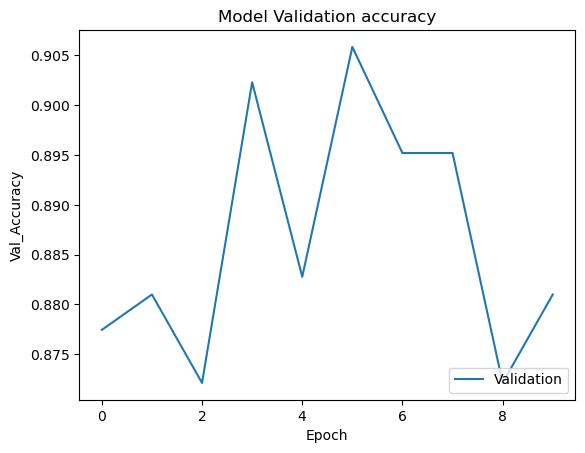

In [25]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation accuracy')
plt.ylabel('Val_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='lower right')
plt.show()